# Introduction to Machine Learning with Pytorch

**Recitation by Dr. Duygu Ataman**

_09/08/2023, 09:30, 14:00 at Room 150_

_09/08/2023, 15:15 Office Hour at Room 350 (For any follow-up questions)_


In these lab sessions, we will be using Jupyter notebooks running on Google Colab, which has most Python libraries installed.

Please make a copy of this notebook in your own Google Drive so you could access your own version and edit the contents to write your answers to given exercises:
https://drive.google.com/file/d/1d2XYP-BYJpKdqLwlbbLpBvPg43sMTXIU/view?usp=sharing
    
This session introduces the cutting-edge machine learning library [PyTorch](https://pytorch.org). With its built-in support for distributed computation, user-friendly programming and debugging functionalities, today it is the most preferred library for machine learning research.

Once you are set, let's start a new Python program and check if you can access PyTorch and its version.

In [1]:
import torch
torch.__version__

'2.0.1+cu118'

## Tensors in PyTorch

In PyTorch, all variables representing information in multi-dimensional space, such as vectors and matrices, are referred to as tensors.

We can initialize a vector with two elements with specific values as follows.

In [ ]:
torch.tensor([1, 2])

We could do the same for a matrix of size 3x3.

In [ ]:
torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

Accesing specific elements in a tensor is straightforward using square indicing, one index representing the position of the element in each dimension:

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x[0, 0]

The first index will access the first dimension, whereas the second index will access the second dimension. The element in the second row, third column can be accessed with:

In [ ]:
x[1, 2]

Note that all elements in a tensor are still encoded as tensors, even if they are unidimensional.

We can use direct indexing to access an entire row or column of a matrix. For instance, the second row of x will be indexed through the 1st position in the 1st dimension:

In [ ]:
x[1, :]

And the first column is indexed as the 0th position in the 2nd dimension:

In [ ]:
x[:, 0]

We can check the dimensions of a tensor using the torch.shape function:

In [ ]:
x.shape

By default, the torch.tensor function creates a tensor with variables of type torch.int64 (64-bit integer). You can check this with the torch.dtype function:

In [ ]:
x.dtype

If we wanted to convert the type of information stored in the tensor we could do so using the Python conversion functions.

In [ ]:
int(x[0, 0])

Other torch functions can help specify creating tensors of a given type:

In [ ]:
x = torch.ByteTensor([1, 2])
x.dtype

In [ ]:
x = torch.ShortTensor([1, 2])
x.dtype

In [ ]:
x = torch.IntTensor([1, 2])
x.dtype

In [ ]:
x = torch.LongTensor([1, 2])
x.dtype

Being able to specify the type is usually helpful to control the memory space used in our program, which can easily become demanding with applications in machine learning. The computations will be faster as the numbers get shorter.

In double precision, we similarly have helper functions for initializing floating-point numbers in any tensor. Same algebraic operations in Python will be applicable in this case.

In [ ]:
y = torch.FloatTensor([[0.5, 1.7], [14.8, 9.2]])
y.dtype

In [ ]:
z = torch.DoubleTensor([[0.5, 1.7], [14.8, 9.2]])

z.dtype

For more information please refer to the official documentation on [PyTorch Data Types](https://pytorch.org/docs/stable/tensors.html).

For initializing larger tensors, PyTorch has the functionality of automatic creating of sample tensors.

For instance, we can create a tensor of size (10, 10, 10) and initialize all elements as zero with torch.zeros:

In [ ]:
torch.zeros(10, 10, 10)

Similarly, we can create a tensor of size (1, 25) and initialize all elements as 1 using torch.ones

In [ ]:
torch.ones(1, 25)

We could even initialize a tensor filled with random values with torch.randn as follows:

In [ ]:
torch.randn(5,5)

## Tensor Operations



PyTorch has many functionalities for linear operations on vectors and matrices. Direct element-wise operations for addition, subtraction, multiplication and division can be implemented using the standard Python notation.

In [ ]:
x = torch.tensor([[5, 2, 7], [6, 0, 3], [3, 2, 8]])
y = torch.tensor([[1, 9, 3], [2, 4, 7], [4, 9, 10]])
print(x)
print(y)
x + y

In [ ]:
x - y

In [ ]:
x * y

In [ ]:
x / y

Note that similar to algebraic notation, matrix multiplication is not equivalent to the standard multiplication operation, denoted with the '*' symbol. Matrix multiplication in PyTorch can be implemented with the '@' operator, or the torch.matmul function.

In [ ]:
x @ y

In [ ]:
torch. matmul(x, y)

## Fundamental properties of vectors and matrices

We can also use PyTorch to study additional properties of a tensor. Let's revisit concepts from vector spaces and measure some fundamental properties of a vector. If x is a three dimensional vector defined as:

In [ ]:
x = torch.tensor([1, 2, 3])

The magnitude of x is defined as the Euclidean norm of the values at each dimension summed together:

In [ ]:
magX = torch.sqrt(x[0]**2 + x[1]**2 + x[2]**2)
print("Magnitude of x is: ", magX)

Similarly, we can compare geometric properties of two vectors using these fundamental properties. Imagine a second vector y with the following three dimensional definition:


In [ ]:
y = torch.tensor([2, 0, 5])

The magnitude of y is:

In [ ]:
magY = torch.sqrt(y[0]**2 + y[1]**2 + y[2]**2)
print("Magnitude of y is: ", magY)

We can compute the dot product between x and y, which will give us a measure of the geometric similarity between the two vectors:

In [ ]:
torch.dot(x, y)

Using the magnitudes and the dot product, we can actually compute the angle between the two vectors, also defined as the cosine similarity, which measure how closely oriented are two vectors in Euclidean space:

In [ ]:
torch.rad2deg(torch.arccos(torch.dot(x, y) / (magX*magY)))

We find that there is a relationship between the directions of x and y in the vector space because the angle between them is nonzero. In case the two vectors are orthogonal, or the angle is zero, this would imply the two vectors are linearly independent.

For matrices and multi-dimensional tensors, PyTorch also has the functionality of computing eigenvalues and eigenvectors to provide additional study of fundamental properties of variables in vector space.

The eigenvalue decomposition of a square matrix (if exists) is defined as:

$$
  A = V diag(\lambda) V^{-1}
$$

where $$ V \in C^{nxn}$$ are the eigenvectors and $$ \lambda \in C^n$$ are the eigenvalues.

In [2]:
x = torch.tensor([[2, 0, 3], [1, 4, 6], [3, 7, 10]], dtype=torch.complex128)
L, V = torch.linalg.eig(x)
print("The eigenvectors are: ", V)
print("The eigenvalues are: ", L)

The eigenvectors are:  tensor([[ 0.1993-0.j,  0.9298+0.j,  0.6133+0.j],
        [ 0.4913-0.j, -0.3670+0.j,  0.5704-0.j],
        [ 0.8479+0.j, -0.0273+0.j, -0.5464+0.j]], dtype=torch.complex128)
The eigenvalues are:  tensor([14.7611+0.j,  1.9121+0.j, -0.6732+0.j], dtype=torch.complex128)


## Linear equations in PyTorch

PyTorch contains many useful linear algebra functions for solving systems of equations, computing inverses, etc.  Below is an example where we use it to solve a system of linear equations $Ax = b$ for the vector $x$.

$$
\begin{bmatrix}1 & 2 & 4 \\ -2 & 3 & 1 \\ -4 & 1 & 2\end{bmatrix}\begin{bmatrix}x_1 \\x_2 \\x_3 \end{bmatrix} = \begin{bmatrix}18 \\ 5 \\ 0\end{bmatrix}
$$


In [ ]:
# Set up the equations.
import torch

A = torch.FloatTensor([[1, 2, 4], [-2, 3, 1], [-4, 1, 2]])
b = torch.FloatTensor([18, 5, 0])

# Solve the system.
x = torch.linalg.solve(A, b)
print('x = ', x)

# Verify the solution by checking the residual is 0.
r = A @ x - b
print('r = ', r)

We can also invert the matrix $A$ and then multiply. Depending on the size of A this could be not the most computationally efficient solution.


In [ ]:
A_inv = torch.linalg.inv(A)

x = A_inv @ b
print('x = ', x)

# Compute the Euclidean norm of the residual.  It should be 0.
norm_r = torch.linalg.norm(A @ x - b)
print('norm_r = ', norm_r)

## Using Matplotlib with PyTorch

In machine learning programs typically there are many variables and information that can be difficult to track by relying on simple logging or printing. We also introduce Matplotlib, the plotting library of Python to aid visualize information related to our machine learning systems in the future.

In Python, we import the following functionalities to set-up any plotting function:

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# Sets the matplotlib backend for ipython notebooks

Let's use matplotlib with torch tensors to plot non-linear functions.

In [ ]:
f = lambda x: torch.sin(x)
x = torch.arange(0,10,0.1)

# Now plot the results.
plt.figure(1)
plt.plot(x, f(x), 'b-', label = r'sine')
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin(x)$')
plt.title(r'The sine function')
plt.legend();

We can also plot surfaces representing multi-dimensional information.

In [ ]:
x, y = torch.meshgrid(torch.arange(-7, 7, 0.5), torch.arange(-7, 7, 0.5))
z = torch.pow(x, 2) + torch.pow(y, 2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title(r'Sphere Function: $z = x^2 + y^2$');

## Exercise 1

Imagine two vectors a and b of shape 3x1 initialized randomly. Using the PyTorch functionalities, determine the magnitude of each vector, the cosine distance and the angle between them and their sum. Using Matplotlib, plot a 3D figure showing the two vectors and their addition vector together in vector space. Comment on the relationship and dependence property between the two vectors.

Length of vector A is:  tensor(0.8266)
Length of vector B is:  tensor(0.9428)
Cosine distance between A and B is:  tensor(0.8814)
Angle between A and B is:  tensor(0.4921)
Adding A to B results in:  tensor([[1.2094],
        [0.9344],
        [0.7813]])


Text(0.5, 0, 'z')

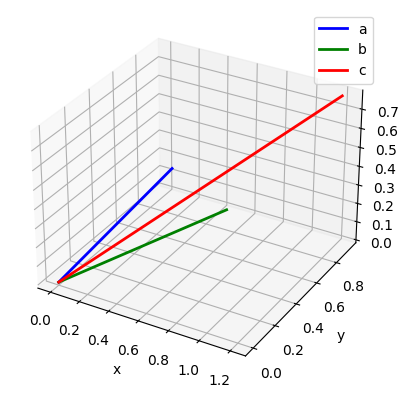

In [10]:
# ** Your answer** #
import torch
import tensorflow as tf

## To-do: initialize a & b
a = torch.rand((3,1))
b = torch.rand((3,1))
a_tf = tf.random.uniform((3,1))
b_tf = tf.random.uniform((3,1))


## To-do: compute magnitude
magA = torch.norm(a)
magB = torch.norm(b)

print("Length of vector A is: ", magA)
print("Length of vector B is: ", magB)

## To-do: compute cosine distance and find angle
cosAB = torch.dot(a[:,0],b[:,0])/(magA*magB)
angleAB = torch.arccos(cosAB)

print("Cosine distance between A and B is: ", cosAB)
print("Angle between A and B is: ", angleAB)

## To-do: compute vector addition
c=a+b

print("Adding A to B results in: ", c)


# Program to plot a vector in 3-d vector space:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure() # init figure
ax = fig.add_subplot(projection='3d') # project into 3d space

ax.plot([0,a[0][0]],[0,a[1][0]],[0,a[2][0]],color='blue',linewidth=2)
ax.plot([0,b[0][0]],[0,b[1][0]],[0,b[2][0]],color='green',linewidth=2)
ax.plot([0,c[0][0]],[0,c[1][0]],[0,c[2][0]],color='red',linewidth=2)
plt.legend(['a', 'b', 'c'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')



## Exercise 2

Imagine a matrix of size 3x3 initialized randomly. Compute the eigenvectors of the matrix and plot in 3-d vector space using Matplotlib.

Text(0.5, 0, 'z')

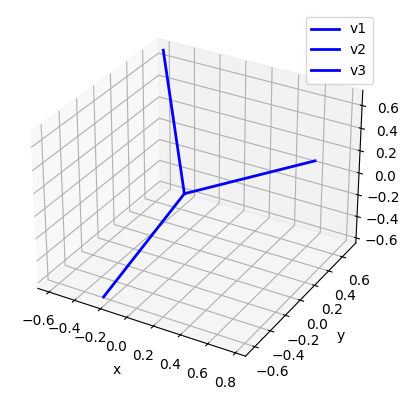

In [23]:
# ** Your answer** #

## To-do: initialize x
x = tf.random.uniform((3,3))

## To-do: run eigenvalue decomposition
vals, V = tf.linalg.eigh(x)


# Program to plot a vector in 3-d vector space:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure() # init figure
ax = fig.add_subplot(projection='3d') # project into 3d space

ax.plot([0,V[0][0]],[0,V[0][1]],[0,V[0][1]],color='blue',linewidth=2)
ax.plot([0,V[1][0]],[0,V[1][1]],[0,V[1][1]],color='blue',linewidth=2)
ax.plot([0,V[2][0]],[0,V[2][1]],[0,V[2][1]],color='blue',linewidth=2)
plt.legend(['v1', 'v2', 'v3'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Exercise 3

Projection of a point b onto a line a can be computed using the following formula:

$$
  proj_a(b) = \frac{a^Tb}{a^Ta}a
$$

Using PyTorch, initialize a random line from the origin to a vector a of size 3x1 and a point b of size 3x1 and compute the projection of b onto line a. Plot line a and the projection using matplotlib.

The new line is:  tf.Tensor([0.29447666 0.11463608 0.5242844 ], shape=(3,), dtype=float32)


Text(0.5, 0, 'z')

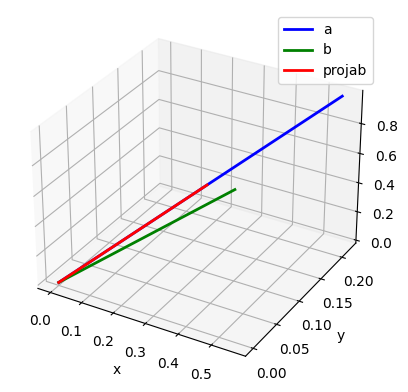

In [59]:
# ** Your answer** #

## To-do: initialize a & b
# a = torch.rand((3))
# b = torch.rand((3))

a = tf.random.uniform([3])
b = tf.random.uniform([3])

## To-do: compute projection
projab = tf.tensordot(a,b,1)/(tf.tensordot(a,a,1))*a

print("The new line is: ", projab)

# Program to plot a vector in 3-d vector space:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure() # init figure
ax = fig.add_subplot(projection='3d') # project into 3d space

ax.plot([0,a[0]],[0,a[1]],[0,a[2]],color='blue',linewidth=2)
ax.plot([0,b[0]],[0,b[1]],[0,b[2]],color='green',linewidth=2)
ax.plot([0,projab[0]],[0,projab[1]],[0,projab[2]],color='red',linewidth=2)

plt.legend(['a', 'b', 'projab'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')